In [4]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
%matplotlib inline 

# [Problem 1] Understanding the content of the competition

<h3>What kind of company is Home Credit?</h3>* Home Credit is a financing service that helps you leverage your buying power to get the products you need for your home. Home Credit can help you with items such as smartphones and tablets, all sorts of electronics, home appliances, and TV satellites.<br>
* About the history, Home Credit is founded in the Czech Republic in 1997, it is a non-bank financial institution headquartered in the Netherlands.<br>
It operates in 9 countries. Focusing on lending to people who have little or no credit history.<br>
It has over 110 million users.<br>
Petr Kellner, presumed to be the wealthiest person in the Czech Republic, is the founder and majority shareholder of the international financial investment group PPF, which is the company's major shareholder (88.62%)..

<h3> What is expected in this competition? </h3>
Predict repayment ability from information other than the customer's credit history. The prediction uses various statistical and machine learning methods

<h3>What are the benefits companies can gain by predicting this?</h3>
The aim is to increase financial inclusion for those who do not have a bank account by providing a positive and safe borrowing experience for those who cannot get loans from other companies.

# [Problem 2] Understanding the overview of data

* Use .head() , .info() , describe() , etc.​ ​
* Check for missing values
* Draw a graph showing the percentage of classes

In [5]:
credit_df = pd.read_csv("./data/application_train.csv")
credit_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
credit_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [8]:
credit_total_null = credit_df.isnull().sum().sort_values(ascending = False)
credit_total_null.head()

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_MEDI    213514
dtype: int64

In [9]:
miss_rate = (credit_df.isnull().sum()/credit_df.isnull().count()*100 ).sort_values(ascending = False)
df_missing = pd.concat([credit_total_null, miss_rate], axis=1, keys=['Total missing', 'Percent missing'])
display(df_missing)

,Total missing,Percent missing
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
...,...,...
REG_CITY_NOT_LIVE_CITY,0,0.000000
LIVE_REGION_NOT_WORK_REGION,0,0.000000
REG_REGION_NOT_WORK_REGION,0,0.000000
HOUR_APPR_PROCESS_START,0,0.000000


<AxesSubplot:>

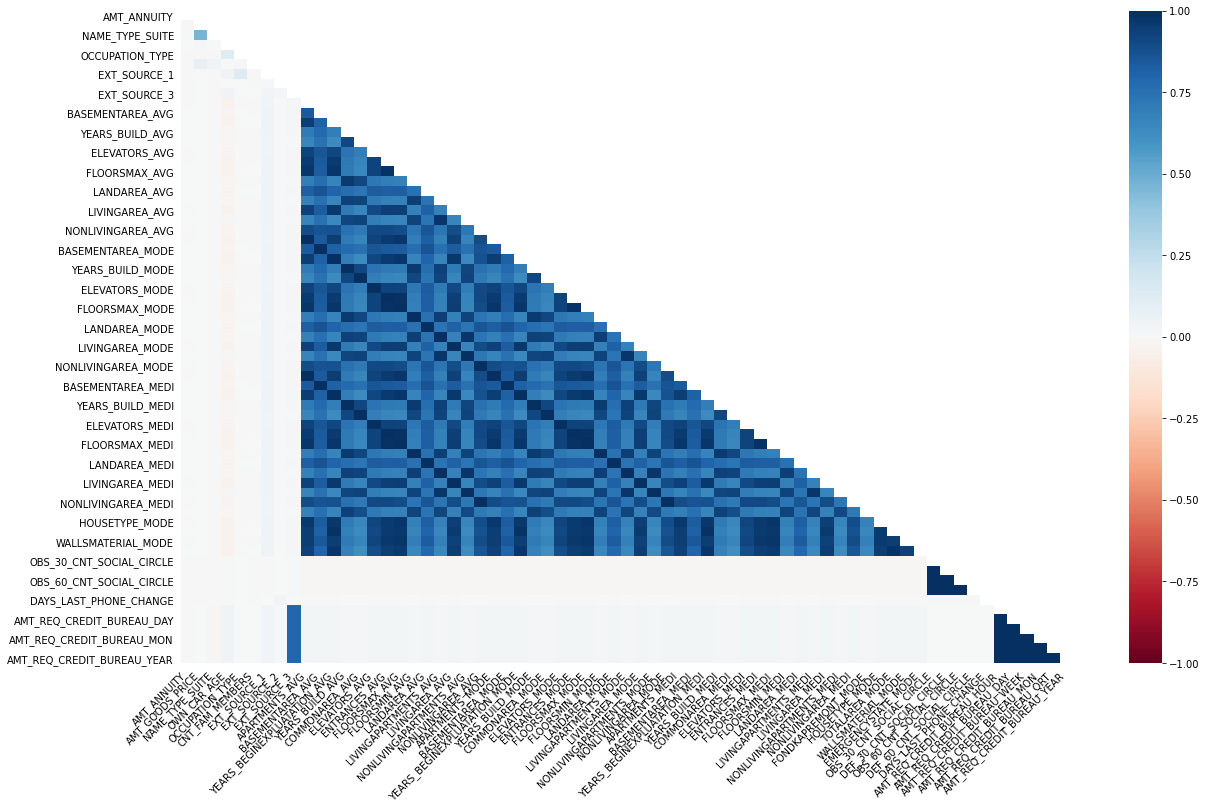

In [10]:
msno.heatmap(credit_df, vmax=1, fontsize=10,labels=False)

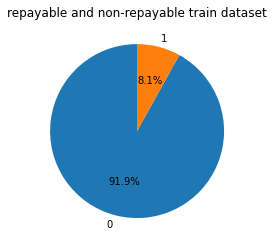

In [11]:
label = ["0" , "1"]
plt.title("repayable and non-repayable train dataset")
plt.pie(credit_df["TARGET"].value_counts(),labels = label , autopct="%1.1f%%" , startangle=90)
plt.show()

# [Problem 3] Defining issues

Issue 1: Preprocessing the data: Define the null value and delete features with 5 or more missing values

Issue 2: Extract features that are highly correlated with TARGET

Issue 3: Create the Plot Function which is generic to plot a certain feature.


In [13]:
credit_miss = credit_df.dropna(how = "any" , axis =1 )
credit_miss.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,...,0,0,0,0,0,0,0,0,0,0


In [14]:
credit_df_dropped = credit_df.drop(df_missing[df_missing["Total missing"] > 5].index , 1)
display(credit_df_dropped.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,...,0,0,0,0,0,0,0,0,0,0


In [24]:
def plot_stats(feature, fig=5):
    temp = credit_df_dropped[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Frequency': temp.values})

    cat_perc = credit_df_dropped[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(fig,10))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Frequency",data=df1)
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    plt.ylabel('Percentage to Target', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.show()

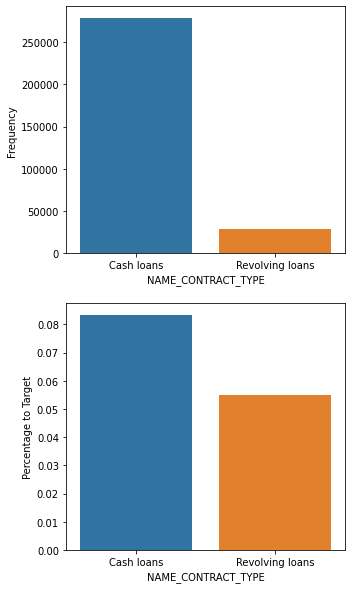

In [18]:
plot_stats('NAME_CONTRACT_TYPE')

The total number of revolving payments is small, but the proportion of target 1 is high. Compare with the rate of revolving credit of 0.

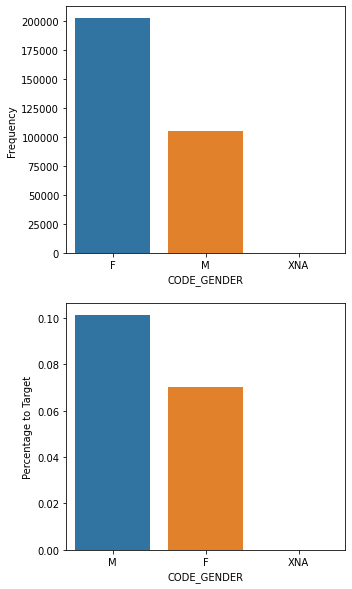

In [19]:
plot_stats('CODE_GENDER')

Women have more applications, but men are more likely to be non-refundable :)

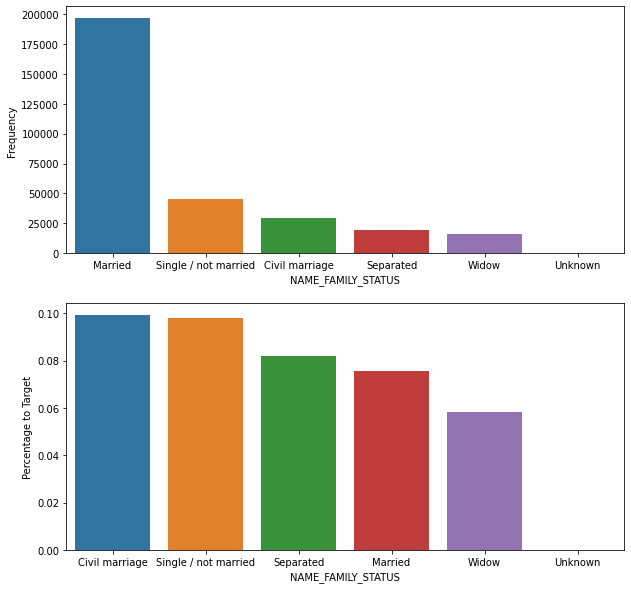

In [25]:
plot_stats('NAME_FAMILY_STATUS', 10)

Among the number of applications, Married (married person) is at the most 200,000. <br>
The number of the next Single / not married (single / unmarried) is about 50,000, which is about 150,000  <br>
Different from Married, but since the non-refundable rate is almost the same , the number of single / not mariied people is about the same. It may have something to do with it. <br>
(The same tendency applies to other configurations)

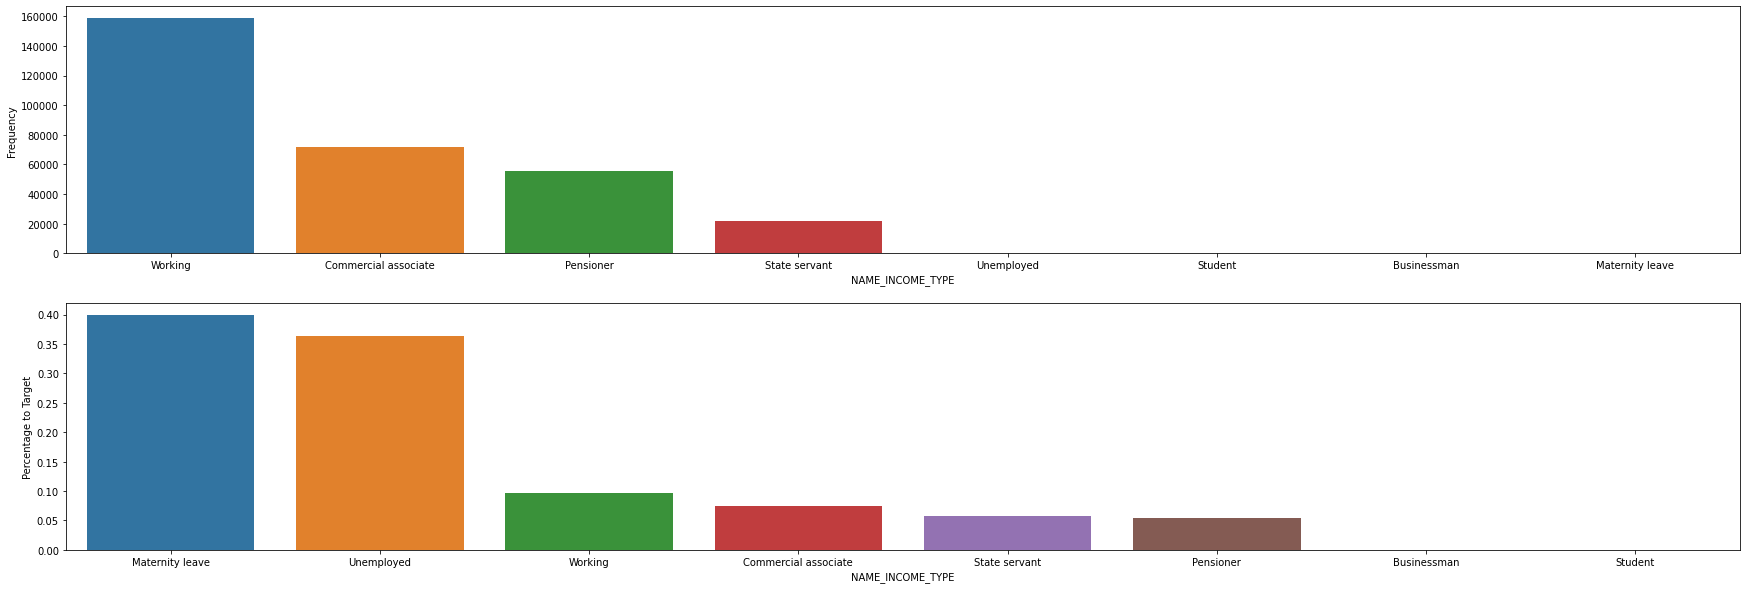

In [28]:
plot_stats('NAME_INCOME_TYPE',30)

With the type of income. People who are nomally working is densed but to be fair, "Maternity leave" contributes to be non-refundable at most.